In [1]:
import pandas as pd

In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.layers import Input, Dense

In [4]:
from sklearn.model_selection import train_test_split

In [32]:
from matplotlib import pyplot as plt

### Pegar os dados do arquivo

In [6]:
df = pd.read_csv("./weatherAUS.csv")

In [11]:
dados = df[["MinTemp", "MaxTemp", "Rainfall", "RainTomorrow"]]

In [12]:
dados

,MinTemp,MaxTemp,Rainfall,RainTomorrow
0,13.4,22.9,0.6,No
1,7.4,25.1,0.0,No
2,12.9,25.7,0.0,No
3,9.2,28.0,0.0,No
4,17.5,32.3,1.0,No
...,...,...,...,...
145455,2.8,23.4,0.0,No
145456,3.6,25.3,0.0,No
145457,5.4,26.9,0.0,No
145458,7.8,27.0,0.0,No


In [18]:
dados.dropna()

,MinTemp,MaxTemp,Rainfall,RainTomorrow
0,13.4,22.9,0.6,No
1,7.4,25.1,0.0,No
2,12.9,25.7,0.0,No
3,9.2,28.0,0.0,No
4,17.5,32.3,1.0,No
...,...,...,...,...
145454,3.5,21.8,0.0,No
145455,2.8,23.4,0.0,No
145456,3.6,25.3,0.0,No
145457,5.4,26.9,0.0,No


In [19]:
dados["Rain"] = dados["RainTomorrow"].replace({"No": 0, "Yes": 1}).to_numpy()

C:\Users\anton\AppData\Local\Temp\ipykernel_24624\2702891659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados["Rain"] = dados["RainTomorrow"].replace({"No": 0, "Yes": 1}).to_numpy()
C:\Users\anton\AppData\Local\Temp\ipykernel_24624\2702891659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Rain"] = dados["RainTomorrow"].replace({"No": 0, "Yes": 1}).to_numpy()


In [22]:
dados = dados.dropna()
dados

,MinTemp,MaxTemp,Rainfall,RainTomorrow,Rain
0,13.4,22.9,0.6,No,0.0
1,7.4,25.1,0.0,No,0.0
2,12.9,25.7,0.0,No,0.0
3,9.2,28.0,0.0,No,0.0
4,17.5,32.3,1.0,No,0.0
...,...,...,...,...,...
145454,3.5,21.8,0.0,No,0.0
145455,2.8,23.4,0.0,No,0.0
145456,3.6,25.3,0.0,No,0.0
145457,5.4,26.9,0.0,No,0.0


In [39]:
modelo = Sequential()
modelo.add( Input( (3, ) ) )
modelo.add( Dense(8, activation='relu') )
modelo.add( Dense(2, activation='relu') )
modelo.add( Dense(1, activation='sigmoid') )
modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 8)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
modelo.compile( optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"] )

In [41]:
fit = modelo.fit( dados[["MinTemp", "MaxTemp", "Rainfall"]], dados[["Rain"]], epochs=20, batch_size=32)

Epoch 1/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.7135 - loss: 0.6242
Epoch 2/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.7917 - loss: 0.4691
Epoch 3/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.8039 - loss: 0.4474
Epoch 4/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.8037 - loss: 0.4478
Epoch 5/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.8048 - loss: 0.4460
Epoch 6/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.8046 - loss: 0.4457
Epoch 7/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.8025 - loss: 0.4477
Epoch 8/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.8037 - loss: 0.4471
Epoch 9/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.8041 - loss: 0.4454
Epoch 10/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.8055 - loss: 0.4459
Epoch 11/20
4378/4378 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.8052 - loss: 0.4456
Epoch 12/20
4378/4378 ━━━━━━

In [29]:
fit.history["Accuracy"]

[0.7897006273269653,
 0.8042060136795044,
 0.8055408596992493,
 0.8053410053253174,
 0.8055551648139954,
 0.8056265711784363,
 0.8059691786766052,
 0.8064403533935547,
 0.8064974546432495,
 0.8067116141319275,
 0.806461751461029,
 0.8065188527107239,
 0.8060905337333679,
 0.80653315782547,
 0.8066188097000122,
 0.8061690926551819,
 0.8063903450965881,
 0.8065759539604187,
 0.8070756793022156,
 0.8068044185638428]

In [ ]:
fit.history["loss"]

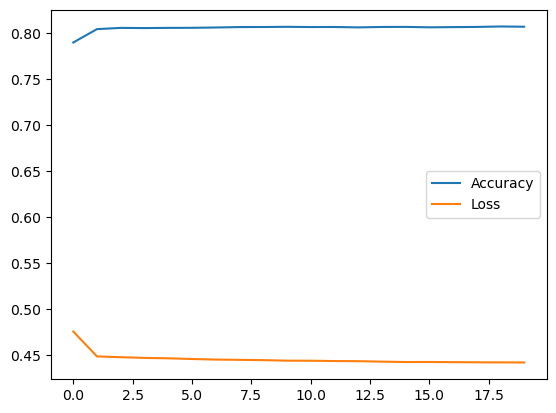

In [35]:
plt.plot(fit.history["Accuracy"], label="Accuracy")
plt.plot(fit.history["loss"], label="Loss")
plt.legend()